In [3]:
library(dplyr)
library(ggplot2)
library(zeallot)
library(tidyr)
library(reshape2)
library(cowplot)
library(latex2exp)
library(stats)
library(aTSA)
options(repr.plot.width = 12, repr.plot.height = 8)

In [54]:
cor_plot <- function(Xt, type="acf", h=30){
    cors <- acf(Xt, plot=FALSE, lag.max=h)
    pcors <- pacf(Xt, plot=FALSE, lag.max=h)

    if (type == "acf"){
        plt <- ggplot() + 
            geom_point(aes(cors$lag, cors$acf), size=3, col="#0057da96") + ggtitle("ACF") +
            geom_line(aes(cors$lag, 0), col="#00244198", size=1) +
            theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20)) +
            xlab("h") +
            ylab("")
    }
    if (type == "pacf"){
        plt <- ggplot() +
            geom_point(aes(pcors$lag, pcors$acf), size=3, col="#0057da96") + ggtitle("PACF") +
            geom_point(aes(0, 1), size=3, col="#0057da96") +
            geom_line(aes(cors$lag, 0), col="#00244198", size=1) +
            theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 20)) +
            xlab("h") +
            ylab("")
    }
    return(plt)
}


pvar <- function(X, k, plot=FALSE){
    vars <- c()
    for (i in 1:(length(X) - k)){
        vars <- append(vars, var(X[i:(i+k)]))
    }
    if (plot){
        plt <- ggplot() + geom_line(aes(1:(length(X) - k), vars), col="#0057da96", size=1)
        return(plt)
    }
}

In [37]:
data <- read.csv("data/data.csv")
data <- data %>% mutate(date = paste(day, month, year, sep="."))
data

day_number,region,country,state,city,month,day,year,temp,date
<int>,<chr>,<chr>,<lgl>,<chr>,<int>,<int>,<int>,<dbl>,<chr>
1,Europe,Poland,NA,Warsaw,1,1,1995,35.4,1.1.1995
2,Europe,Poland,NA,Warsaw,1,2,1995,30.5,2.1.1995
3,Europe,Poland,NA,Warsaw,1,3,1995,27.2,3.1.1995
4,Europe,Poland,NA,Warsaw,1,4,1995,22.9,4.1.1995
5,Europe,Poland,NA,Warsaw,1,5,1995,18.7,5.1.1995
6,Europe,Poland,NA,Warsaw,1,6,1995,19.7,6.1.1995
7,Europe,Poland,NA,Warsaw,1,7,1995,21.6,7.1.1995
8,Europe,Poland,NA,Warsaw,1,8,1995,26.6,8.1.1995
9,Europe,Poland,NA,Warsaw,1,9,1995,27.4,9.1.1995


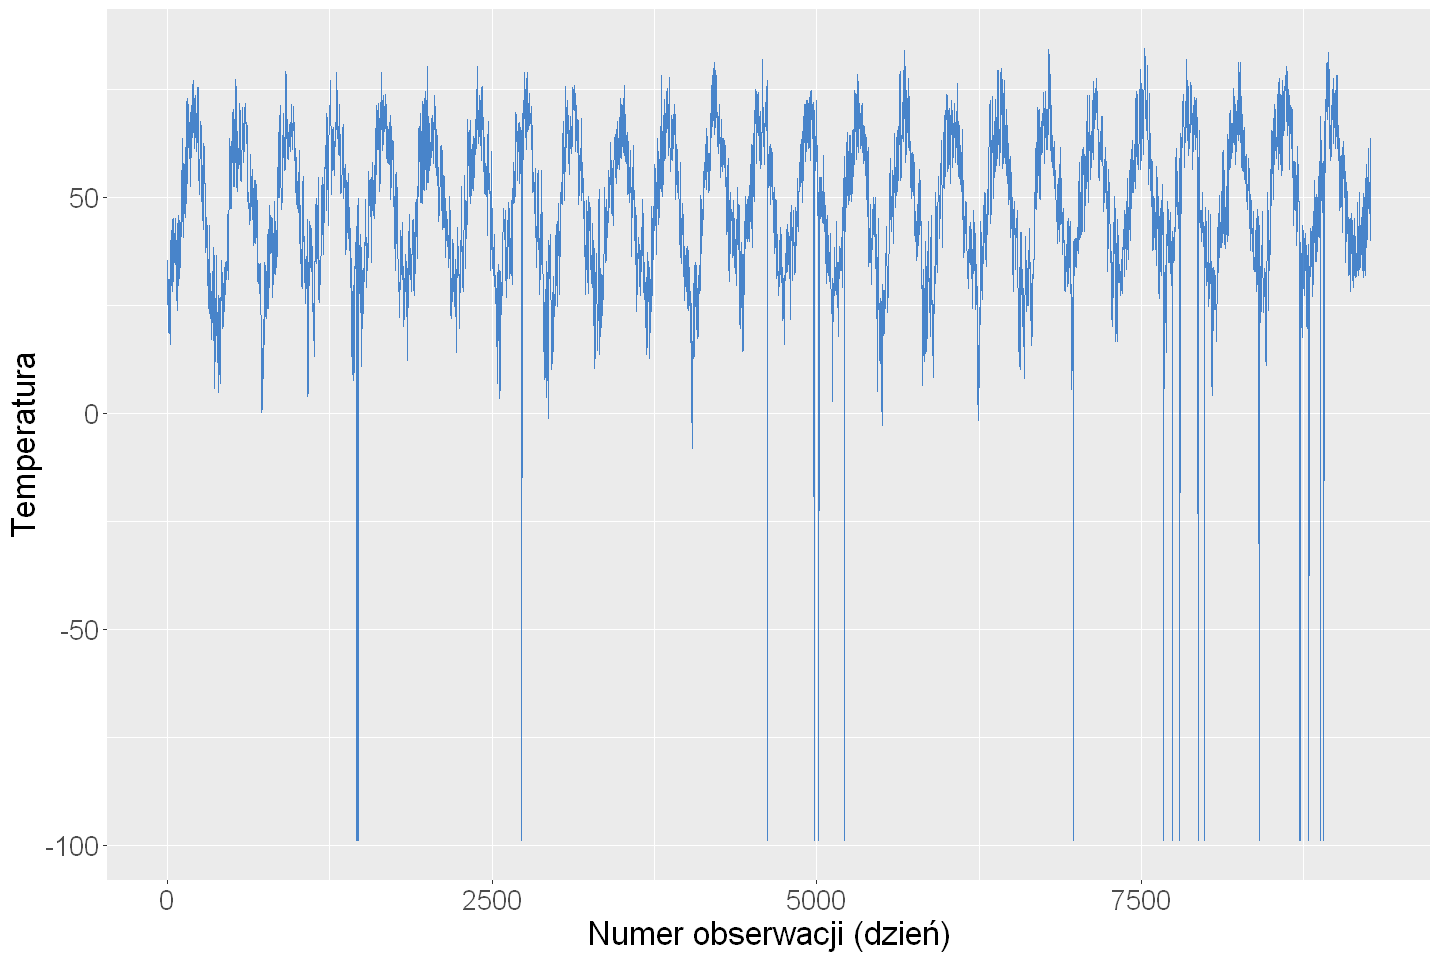

In [41]:
plt <- ggplot() + 
  geom_line(aes(x=data$day_number, y=data$temp), col="#0057bbb1") + 
  xlab("Numer obserwacji (dzień)") + 
  ylab("Temperatura") +
  theme(text = element_text(size = 20))
plt
ggsave("images/raw_data.pdf", plt, width=14, height=6)

In [38]:
new_data <- data[2730:4622,]
day <- new_data$day_number
temp <- new_data$temp

In [7]:
length(temp)

[1] 1893

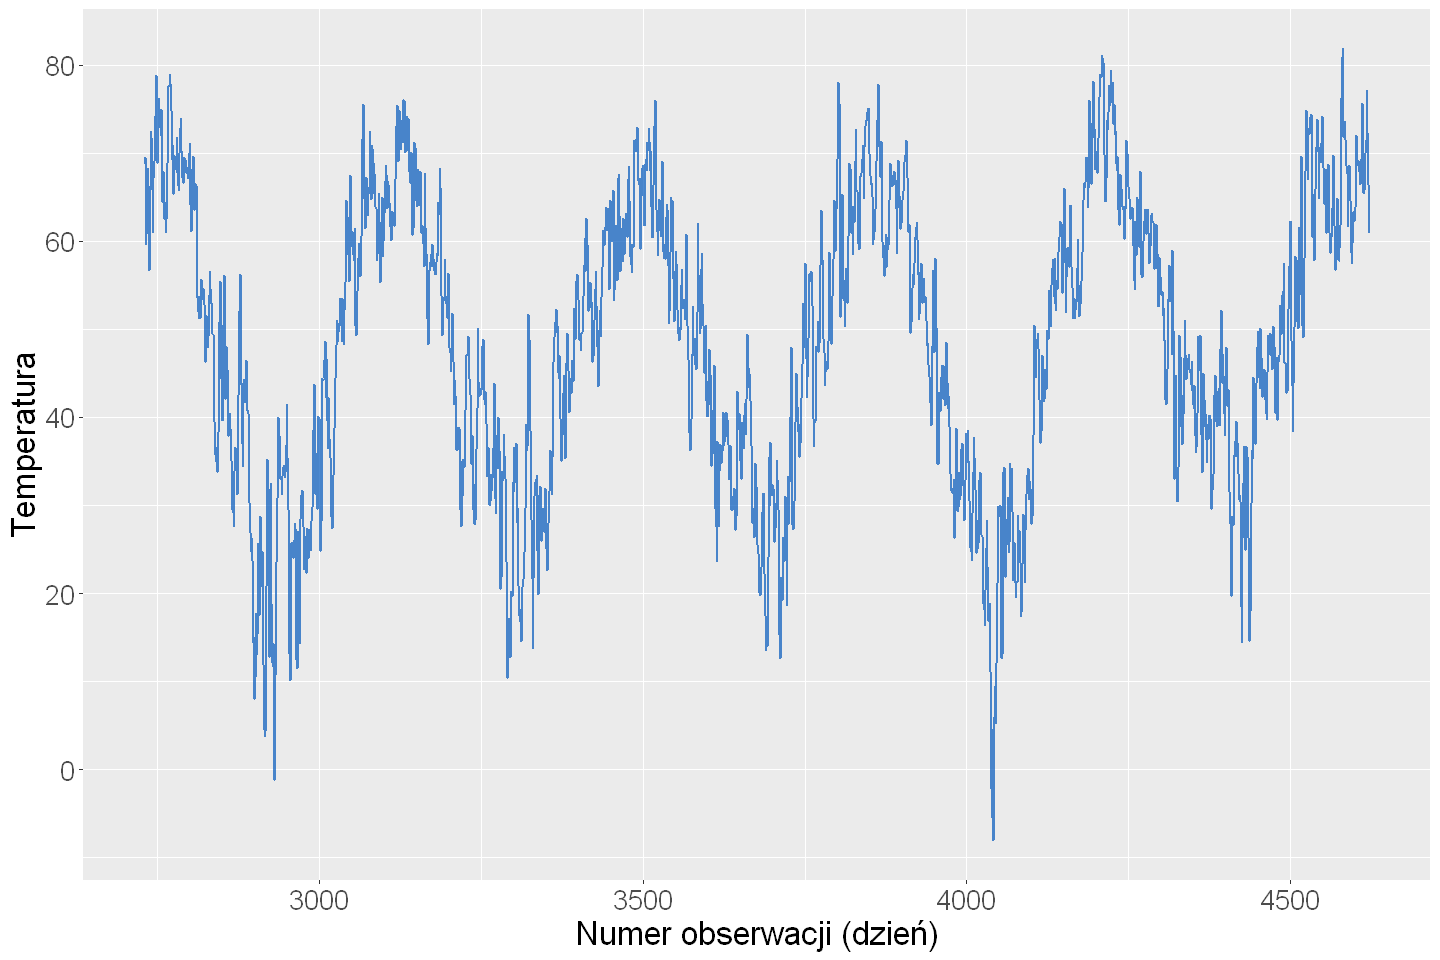

In [42]:
plt <- ggplot() + 
  geom_line(aes(day, temp), col="#0057bbb1", size=0.8) + 
  xlab("Numer obserwacji (dzień)") + 
  ylab("Temperatura") +
  theme(text = element_text(size = 20))
plt
ggsave("images/range_data.pdf", plt, width=14, height=6)

Warning message:
"Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead."


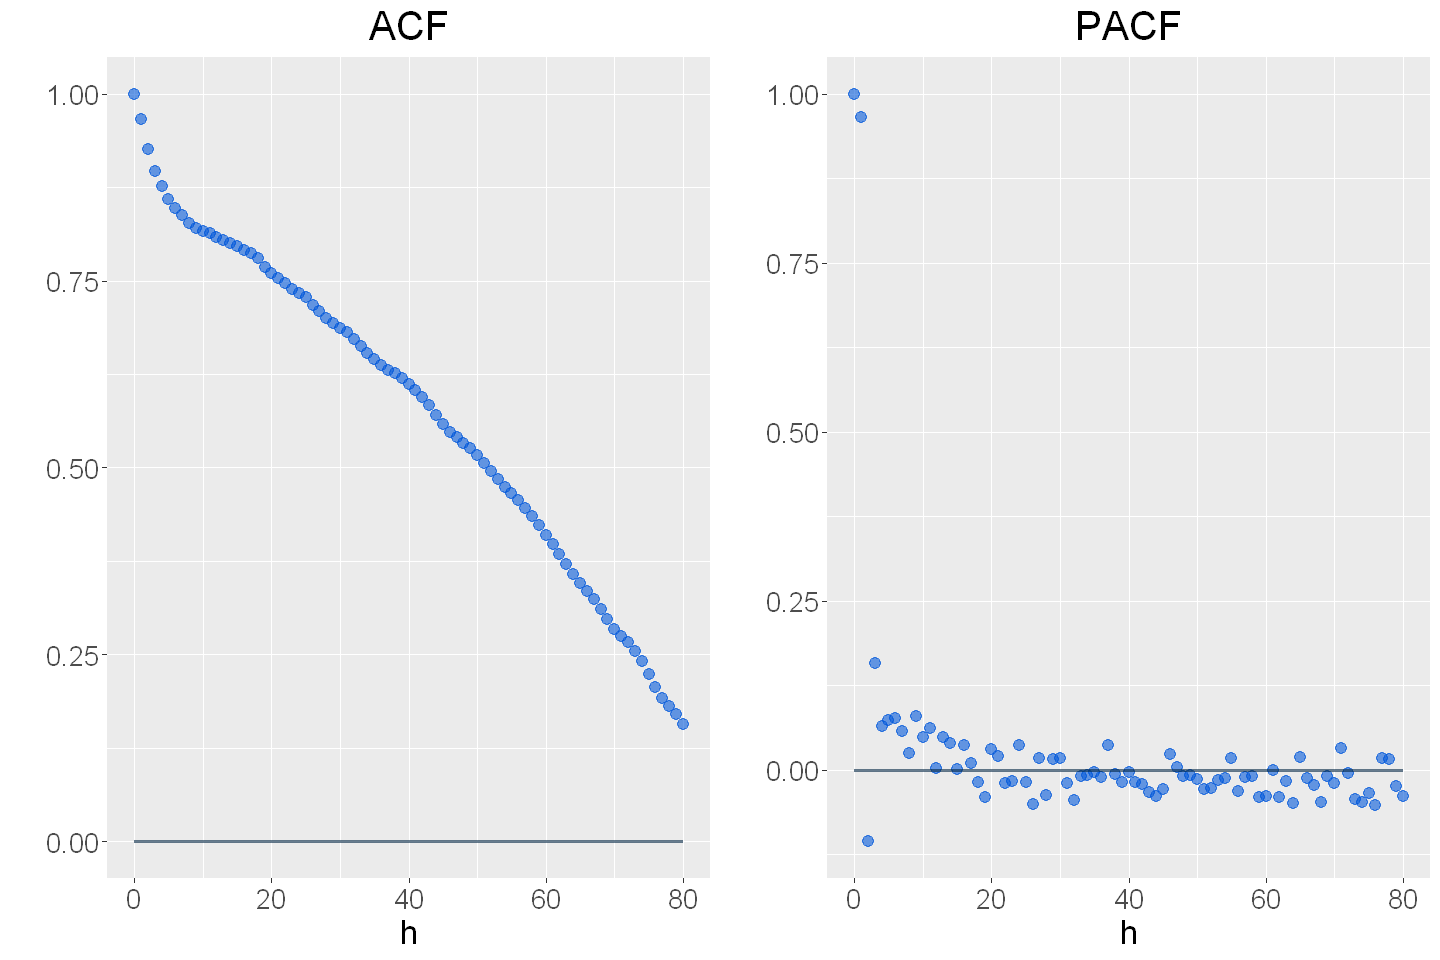

In [9]:
plt1 <- cor_plot(temp, h=80)
plt2 <- cor_plot(temp, "pacf", 80)
plt <- plot_grid(plt1, plt2, align="h")
plt
ggsave("images/raw_acf.pdf", plt, width=14, height=6)

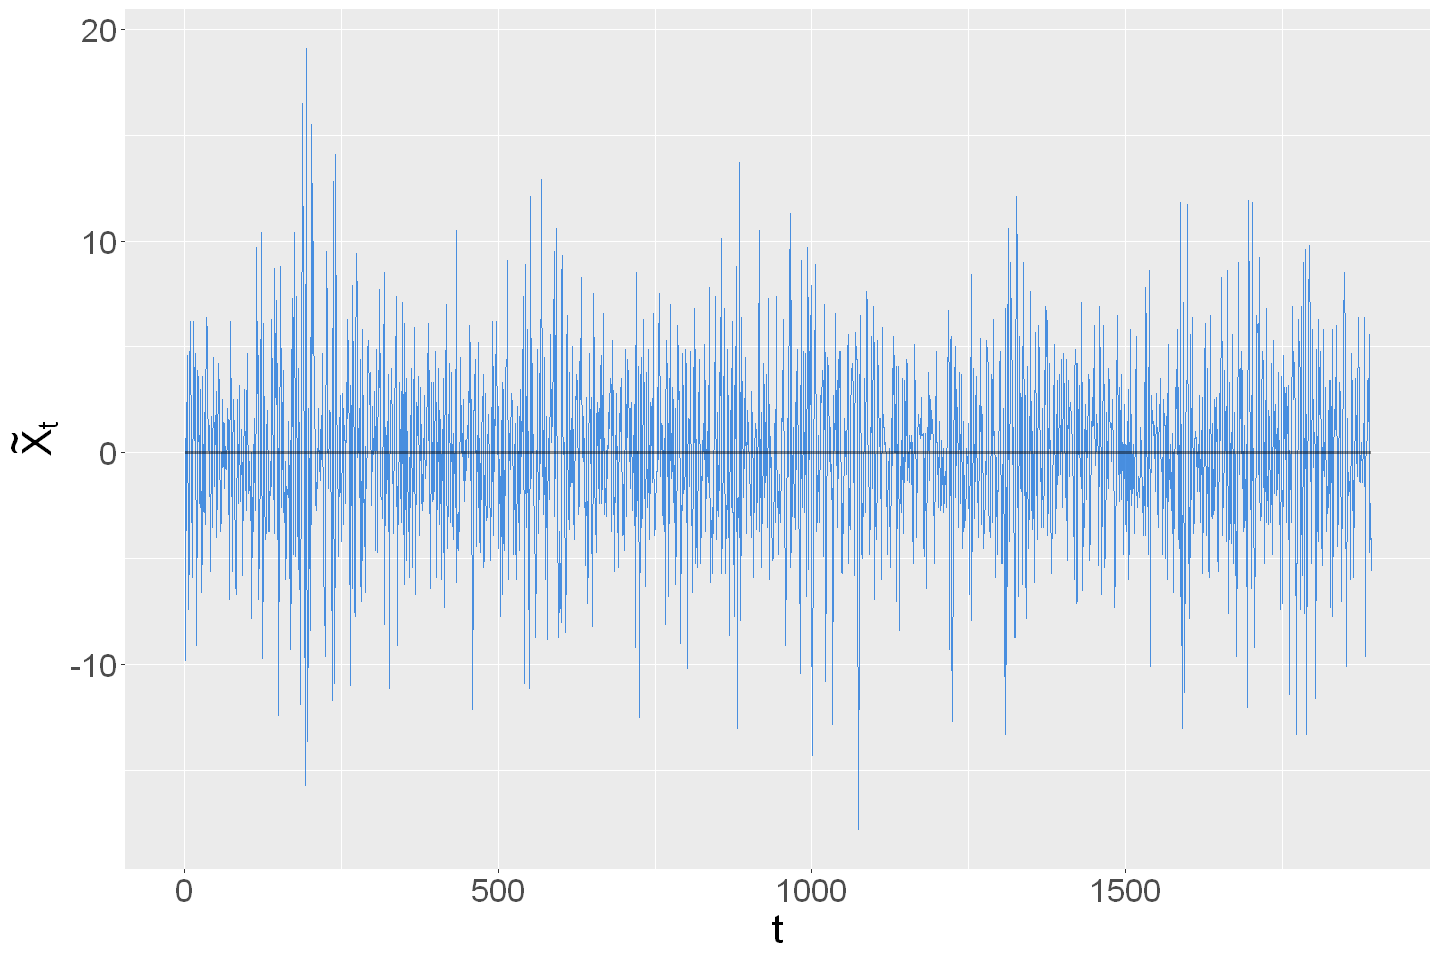

In [45]:
temp_diff <- diff(temp)
plt <- ggplot() +
  geom_line(aes(1:length(temp_diff), temp_diff), col="#0065d9b1") +
  xlab("t") +
  ylab(TeX("$\\tilde{X}_t$")) +
  geom_line(aes(1:length(temp_diff), 0), col="#00000073", size=1) +
  theme(plot.title = element_text(hjust = 0.5), text = element_text(size = 24))
plt
ggsave("images/diff_temp.pdf", plt, width=14, height=6)

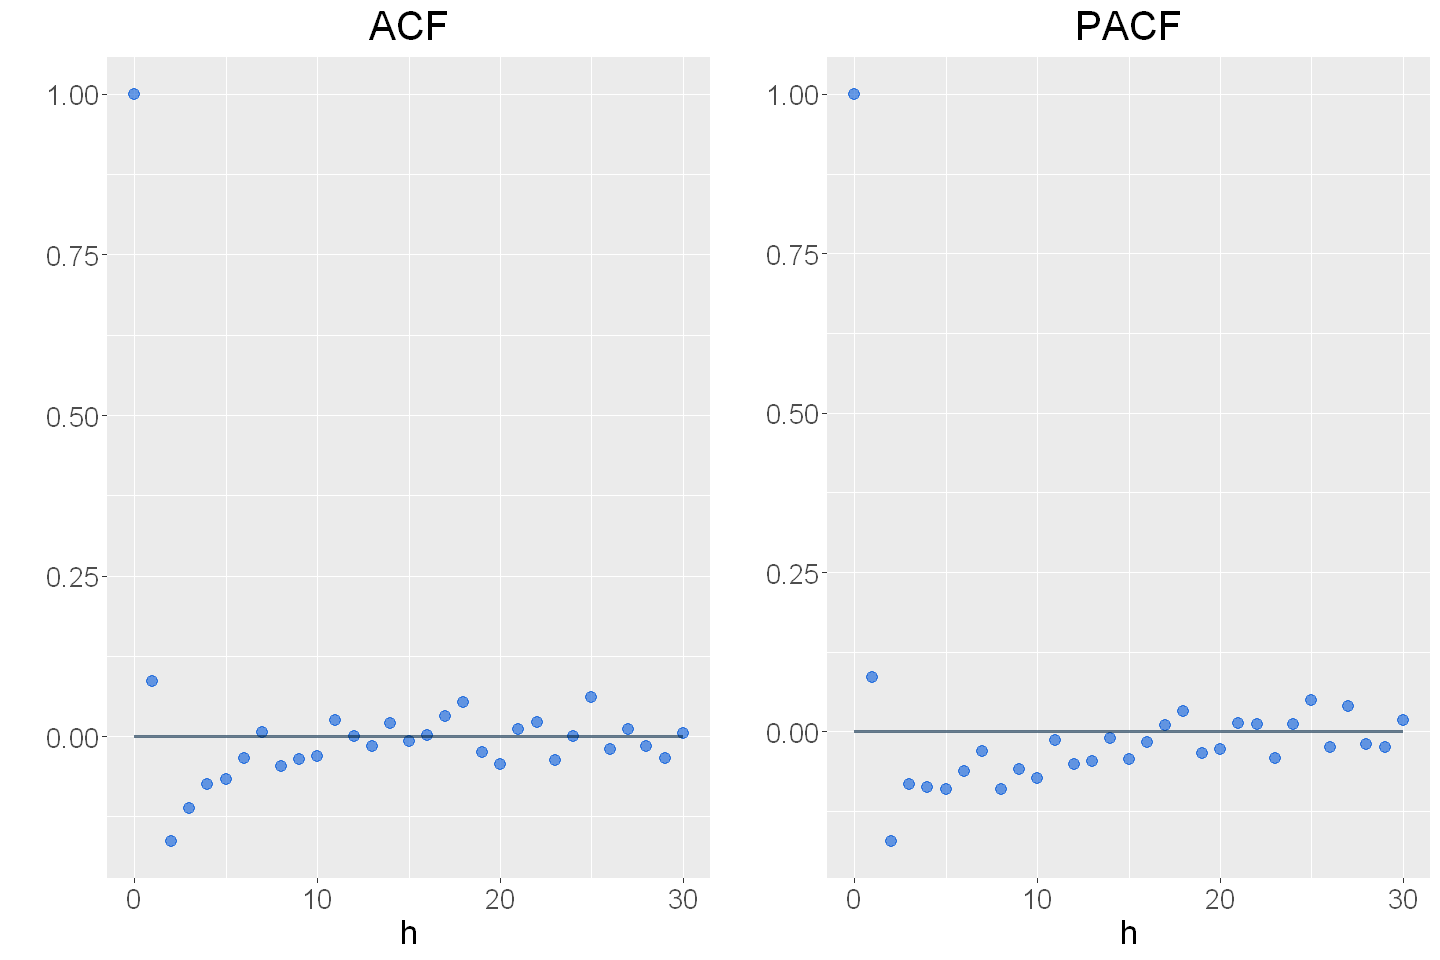

In [46]:
plt1 <- cor_plot(temp_diff)
plt2 <- cor_plot(temp_diff, "pacf")
plt <- plot_grid(plt1, plt2, align="h")
plt
ggsave("images/diff_acf.pdf", plt, width=14, height=6)

In [26]:
adf.test(temp_diff)

Augmented Dickey-Fuller Test 
alternative: stationary 
 
Type 1: no drift no trend 
     lag   ADF p.value
[1,]   0 -39.9    0.01
[2,]   1 -35.0    0.01
[3,]   2 -29.6    0.01
[4,]   3 -26.7    0.01
[5,]   4 -24.8    0.01
[6,]   5 -23.0    0.01
[7,]   6 -20.9    0.01
[8,]   7 -20.6    0.01
Type 2: with drift no trend 
     lag   ADF p.value
[1,]   0 -39.8    0.01
[2,]   1 -35.0    0.01
[3,]   2 -29.6    0.01
[4,]   3 -26.6    0.01
[5,]   4 -24.8    0.01
[6,]   5 -23.0    0.01
[7,]   6 -20.9    0.01
[8,]   7 -20.6    0.01
Type 3: with drift and trend 
     lag   ADF p.value
[1,]   0 -39.8    0.01
[2,]   1 -35.0    0.01
[3,]   2 -29.5    0.01
[4,]   3 -26.6    0.01
[5,]   4 -24.8    0.01
[6,]   5 -22.9    0.01
[7,]   6 -20.9    0.01
[8,]   7 -20.6    0.01
---- 
Note: in fact, p.value = 0.01 means p.value <= 0.01 


In [176]:
p_max <- 8
q_max <- 8

AIC_values <- matrix(nrow=p_max+1, ncol=q_max+1)

for (p in 0:p_max){
  for (q in 0:q_max){
    model <- arima(temp_diff, order = c(p, 0, q))
    AIC_values[p+1, q+1] <- model$aic
  }
}

indices <- which(AIC_values == min(AIC_values), arr.ind = TRUE)
p_found <- indices[1]-1
q_found <- indices[2]-1
c(p_found, q_found)

Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny problem zbieżności: 'optim' zwrócił kod= 1"
Warning message in arima(temp_diff, order = c(p, 0, q)):
"prawdopodobny 

[1] 3 4

In [47]:
model <- arima(temp_diff, order = c(3, 0, 4), method="ML")

print(model)

coefficients <- model$coef
coef_sigma <- sqrt(model$sigma2)
AIC_value <- model$aic
residuals <- model$residuals


Call:
arima(x = temp_diff, order = c(3, 0, 4), method = "ML")

Coefficients:


Warning message in sqrt(diag(x$var.coef)):
"wyprodukowano wartości NaN"


         ar1     ar2     ar3      ma1      ma2      ma3      ma4  intercept
      0.1037  0.0498  0.1979  -0.0583  -0.2693  -0.3274  -0.0691    -0.0004
s.e.  0.5321  0.7453     NaN   0.5370   0.6993      NaN      NaN     0.0398

sigma^2 estimated as 16.5:  log likelihood = -5336.74,  aic = 10691.48


Warning message:
"Continuous limits supplied to discrete scale.
ℹ Did you mean `limits = factor(...)` or `scale_*_continuous()`?"
Warning message:
"Continuous limits supplied to discrete scale.
ℹ Did you mean `limits = factor(...)` or `scale_*_continuous()`?"


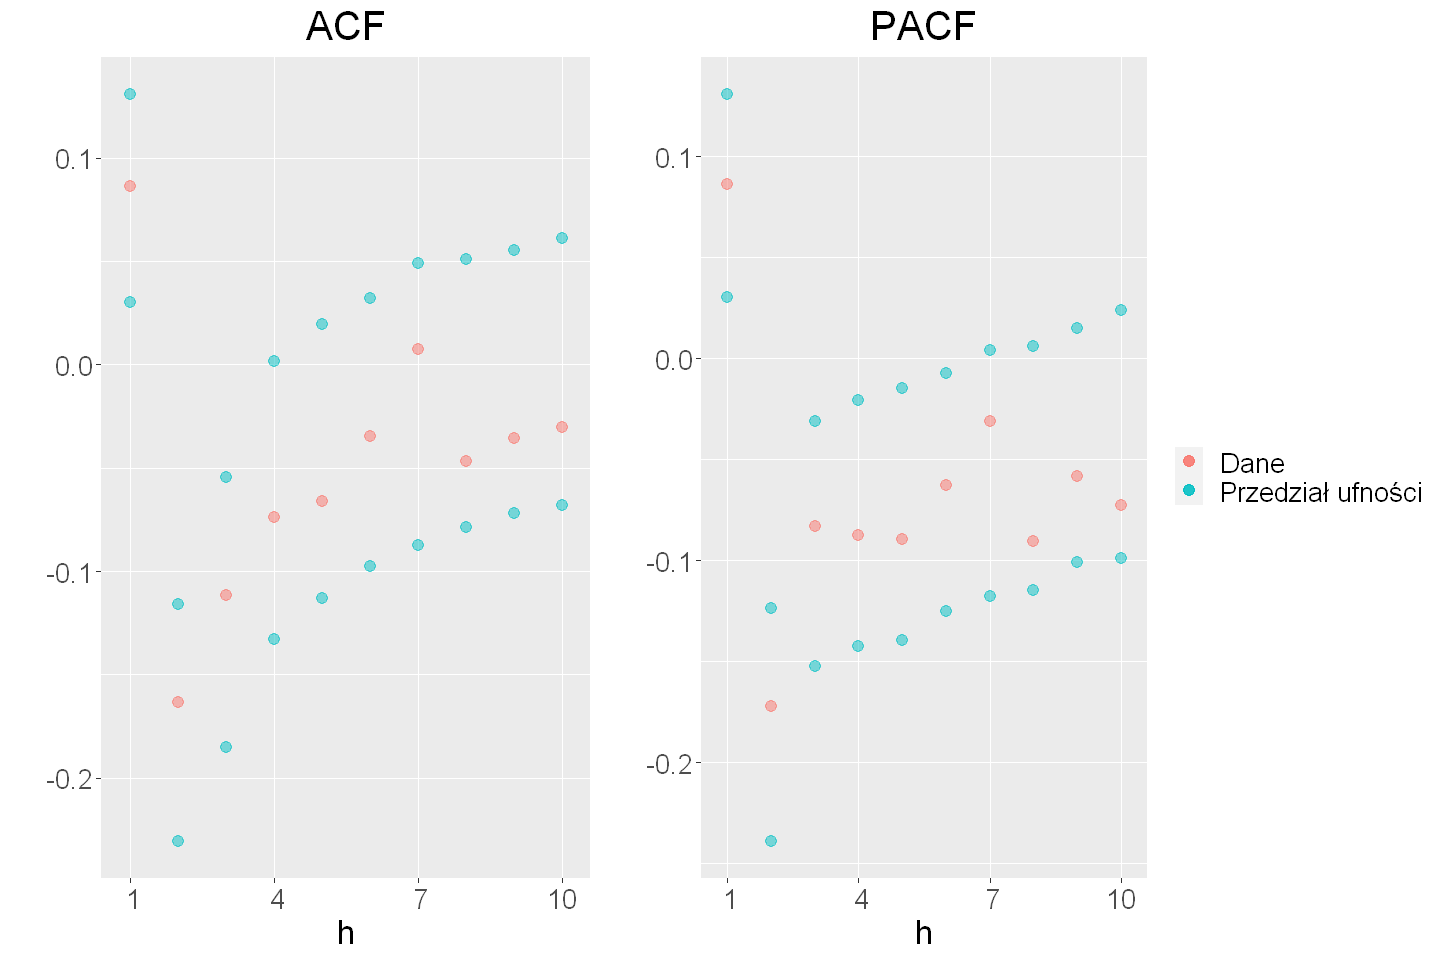

In [14]:
M <- 1000
h <- 10
alpha <- 0.05

cor_matrix <- matrix(0, nrow = M, ncol = h)
pcor_matrix <- matrix(0, nrow = M, ncol = h)

for (j in 1:M){
    
    Xt <- arima.sim(model = list(order = c(3, 0, 4), ar = coefficients[1:3], ma = coefficients[4:7]), n = 1000, sd = sqrt(coef_sigma))

    cors <- acf(Xt, lag.max=h, plot=FALSE)$acf
    cors <- cors[2:(length(cors))]
    cor_matrix[j,] <- cors

    pcors <- pacf(Xt, lag.max=h, plot=FALSE)$acf
    pcor_matrix[j,] <- pcors
}

q_d <- c()
q_g <- c()
pq_d <- c()
pq_g <- c()
for (i in 1:h){
    q_d <- append(q_d, quantile(cor_matrix[,i], alpha/2))
    q_g <- append(q_g, quantile(cor_matrix[,i], 1 - alpha/2))
    pq_d <- append(pq_d, quantile(pcor_matrix[,i], alpha/2))
    pq_g <- append(pq_g, quantile(pcor_matrix[,i], 1 - alpha/2))
}

cors <- acf(temp_diff, plot=FALSE, lag.max=h)$acf
cors <- cors[2:(length(cors))]
plt1 <- ggplot() + 
  geom_point(aes(1:h, q_d, col="Przedział ufności"), size=3, alpha=0.5) +
  geom_point(aes(1:h, q_g, col="Przedział ufności"), size=3, alpha=0.5) +
  geom_point(aes(1:h, cors, col="Dane"), size=3, alpha=0.5) +
  #scale_color_manual() +
  theme(legend.position = "none", plot.title = element_text(hjust = 0.5), text = element_text(size = 20)) +
  scale_x_discrete(limits=c(1, 4, 7, 10)) +
  ggtitle("ACF") +
  ylab("") +
  xlab("h")

pcors <- pacf(temp_diff, plot=FALSE, lag.max=h)$acf
plt2 <- ggplot() + 
  geom_point(aes(1:h, pq_d, col="Przedział ufności"), size=3, alpha=0.5) +
  geom_point(aes(1:h, pq_g, col="Przedział ufności"), size=3, alpha=0.5) +
  geom_point(aes(1:h, pcors, col="Dane"), size=3, alpha=0.5) +
  theme(legend.title=element_blank(), plot.title = element_text(hjust = 0.5), text = element_text(size = 20)) +
  scale_x_discrete(limits=c(1, 4, 7, 10)) +
  ggtitle("PACF") +
  ylab("") +
  xlab("h")

plt <- plot_grid(plt1, plt2, rel_widths = c(1, 1.4))
plt
ggsave("images/conf_intervals.pdf", plt, width=14, height=6)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


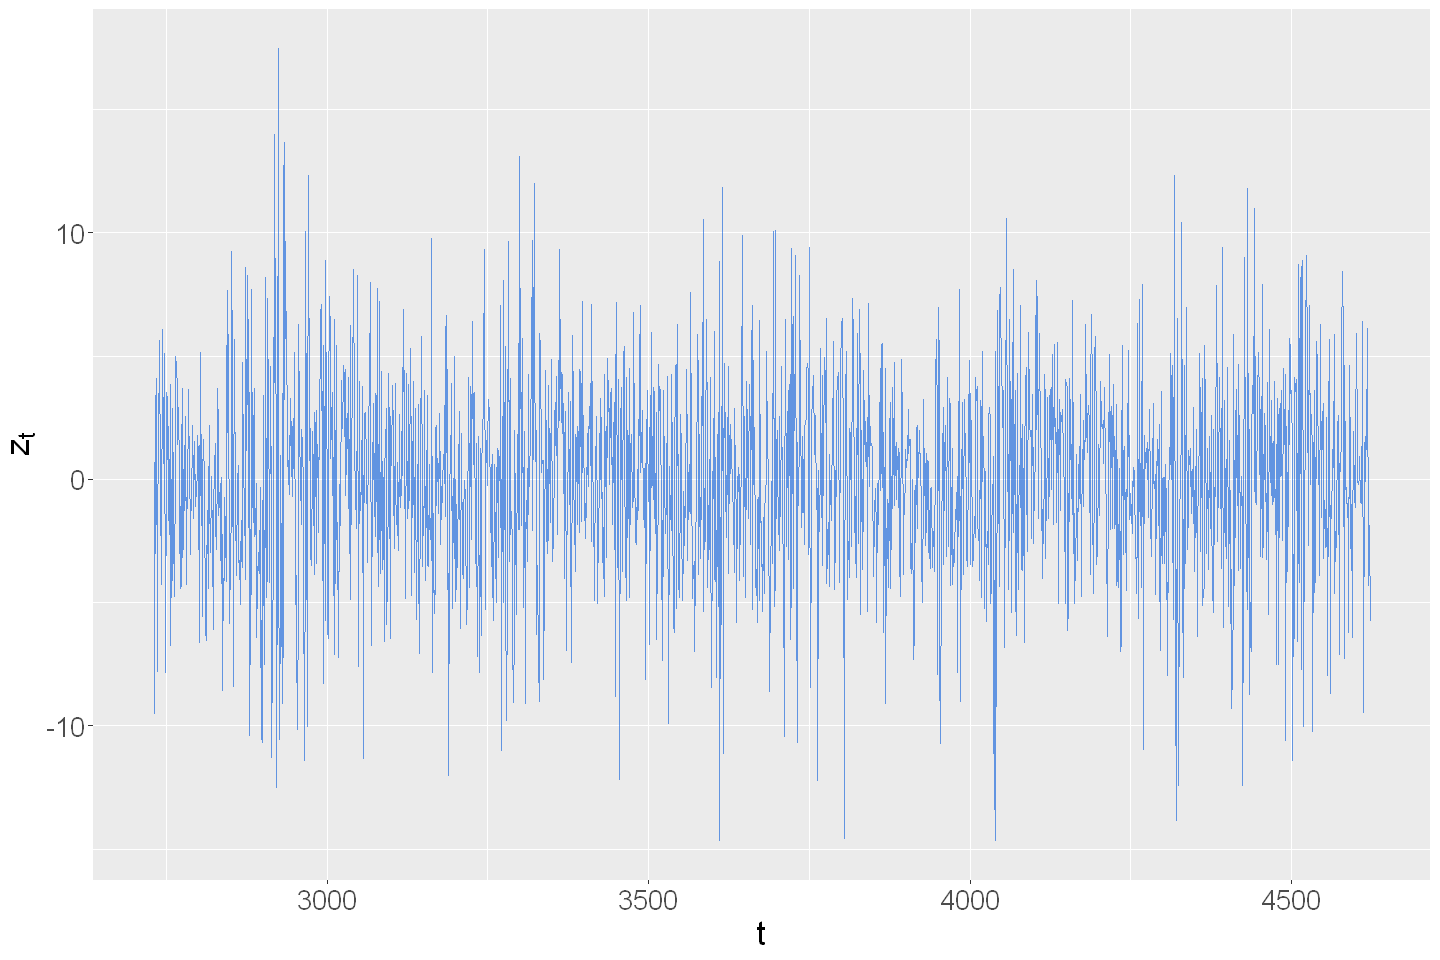

In [58]:
plt <- ggplot() + 
  geom_line(aes(x=day[2:length(day)], y=residuals), col="#0057da96")  + 
  xlab("t") + 
  ylab(TeX("$z_t$")) +
  theme(text = element_text(size = 20))
plt
ggsave("images/res_data.pdf", plt, width=14, height=6)

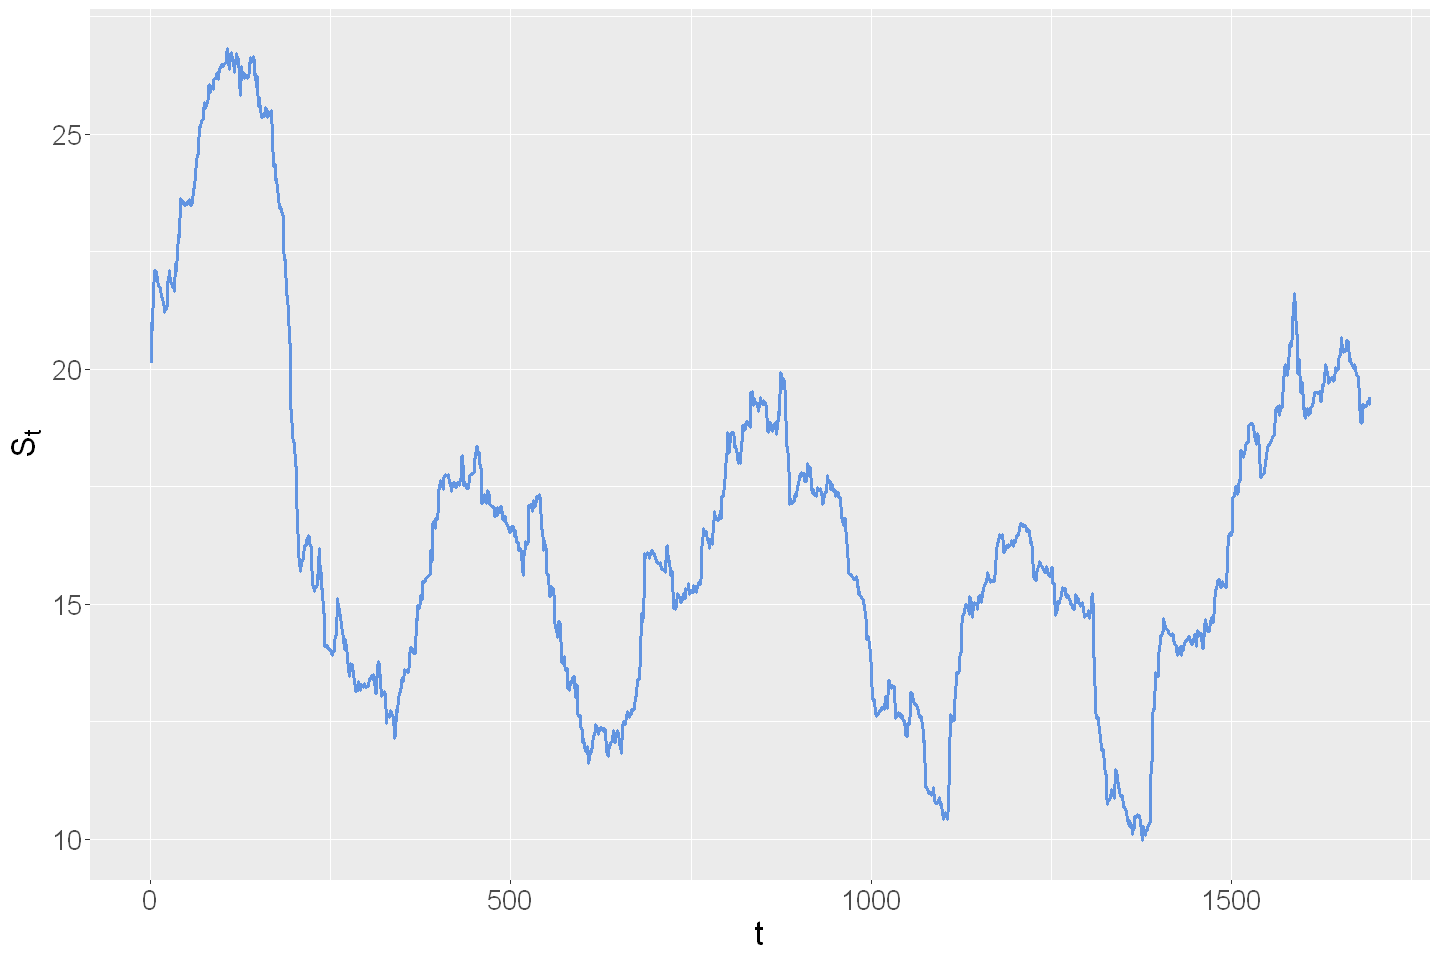

In [55]:
vars <- pvar(residuals, 200, TRUE)
vars <- vars + 
  xlab("t") + 
  ylab(TeX("$S_t$") )+ 
  theme(text = element_text(size = 20))
vars
ggsave("images/var_res_data.pdf", vars, width=14, height=6)

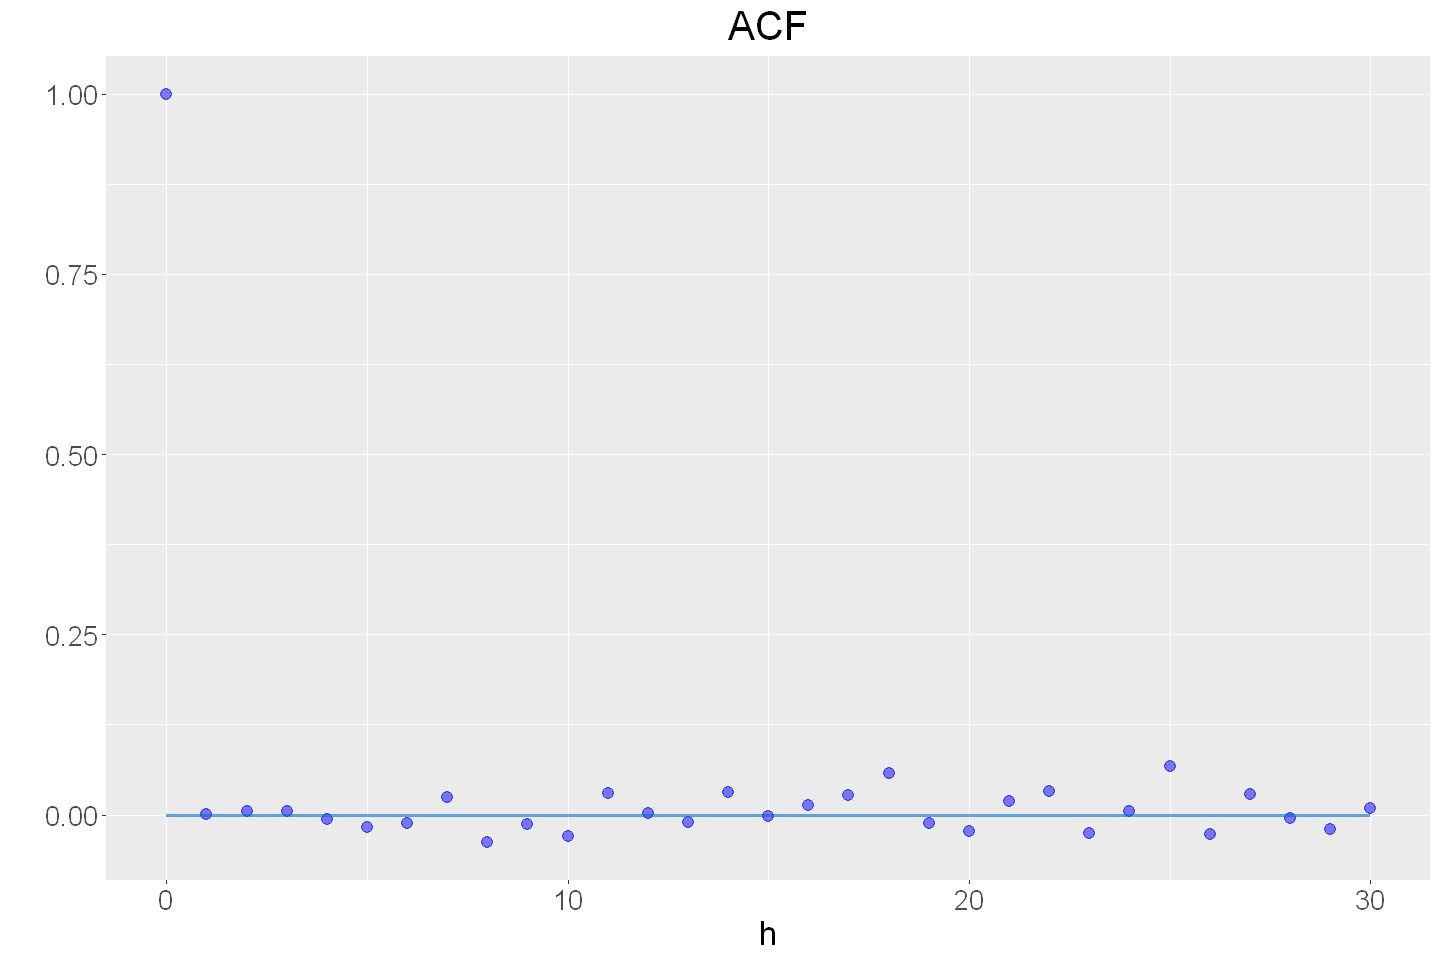

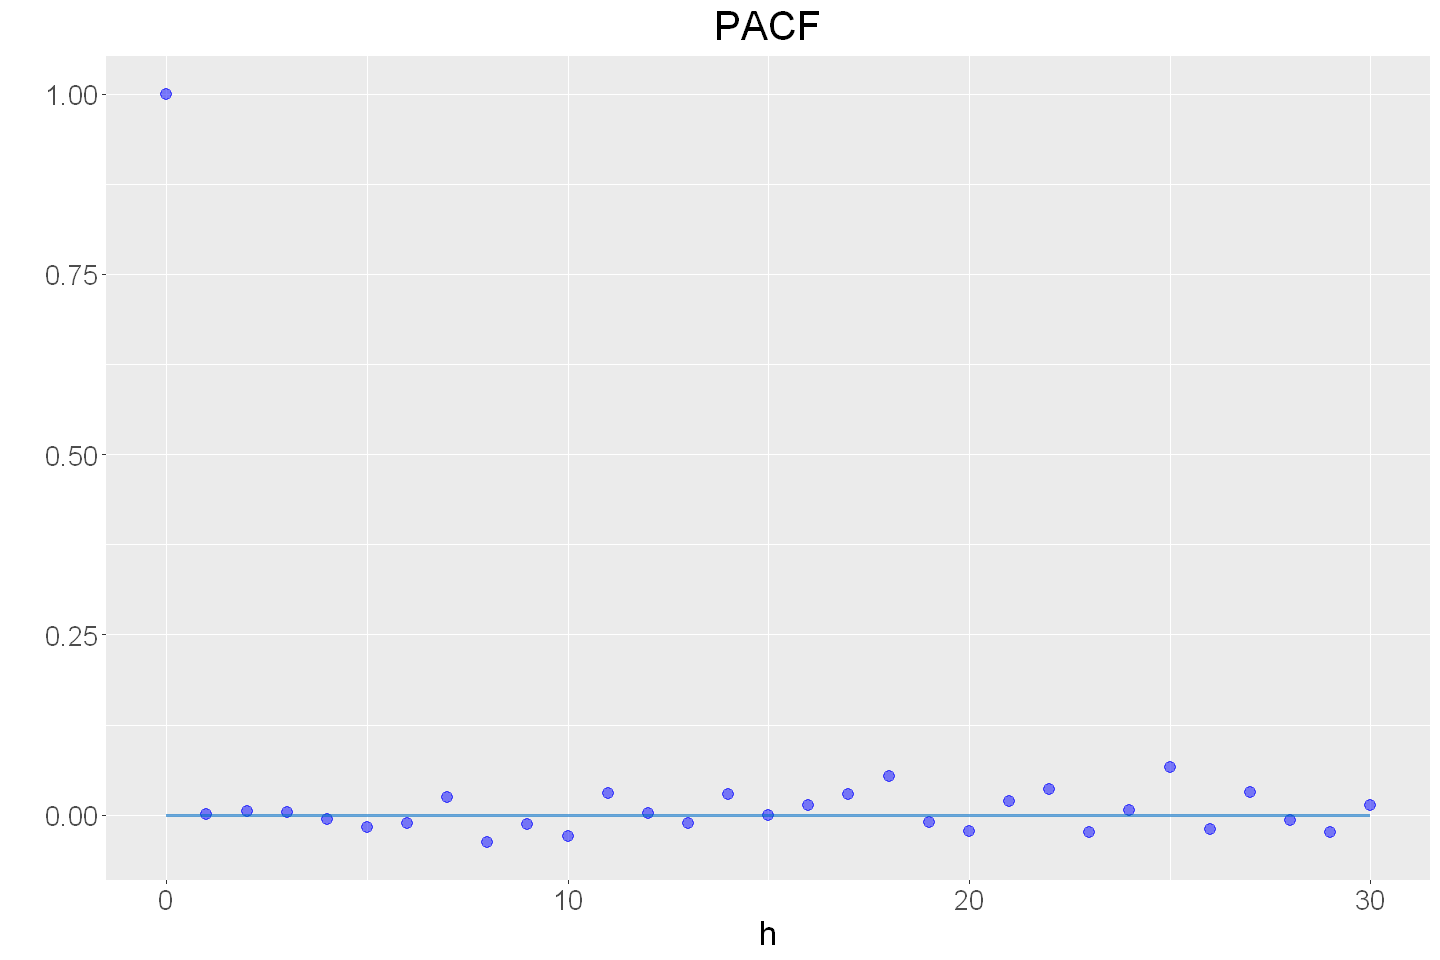

In [90]:
cor_plot(residuals)
cor_plot(residuals, "pacf")

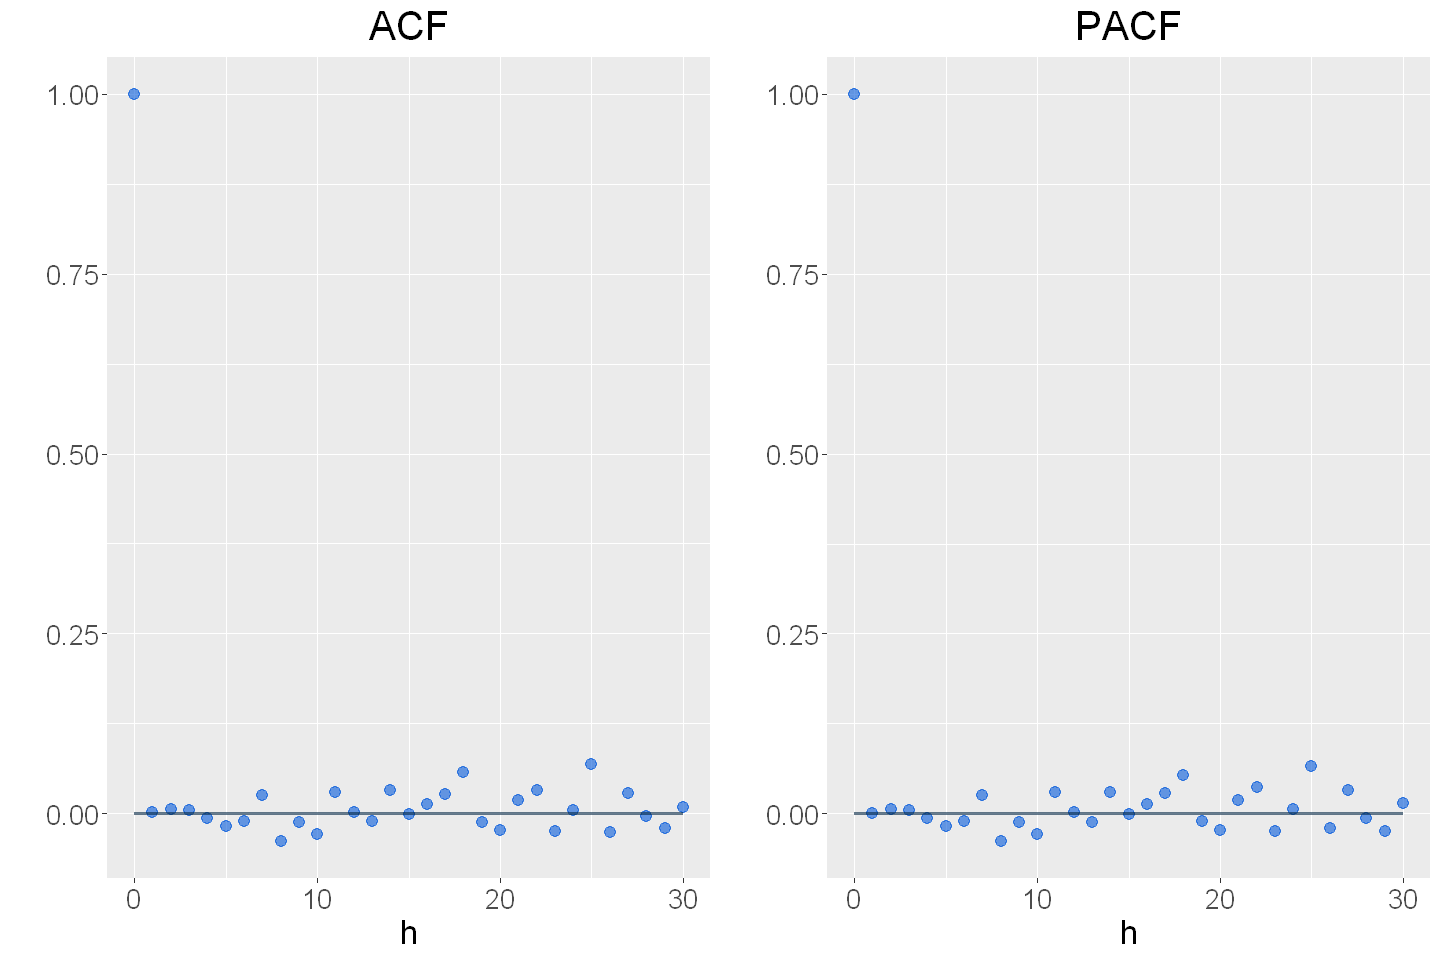

In [49]:
plt1 <- cor_plot(residuals)
plt2 <- cor_plot(residuals, "pacf")
plt <- plot_grid(plt1, plt2, align="h")
plt
ggsave("images/acf_res.pdf", plt, width=14, height=6)

Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


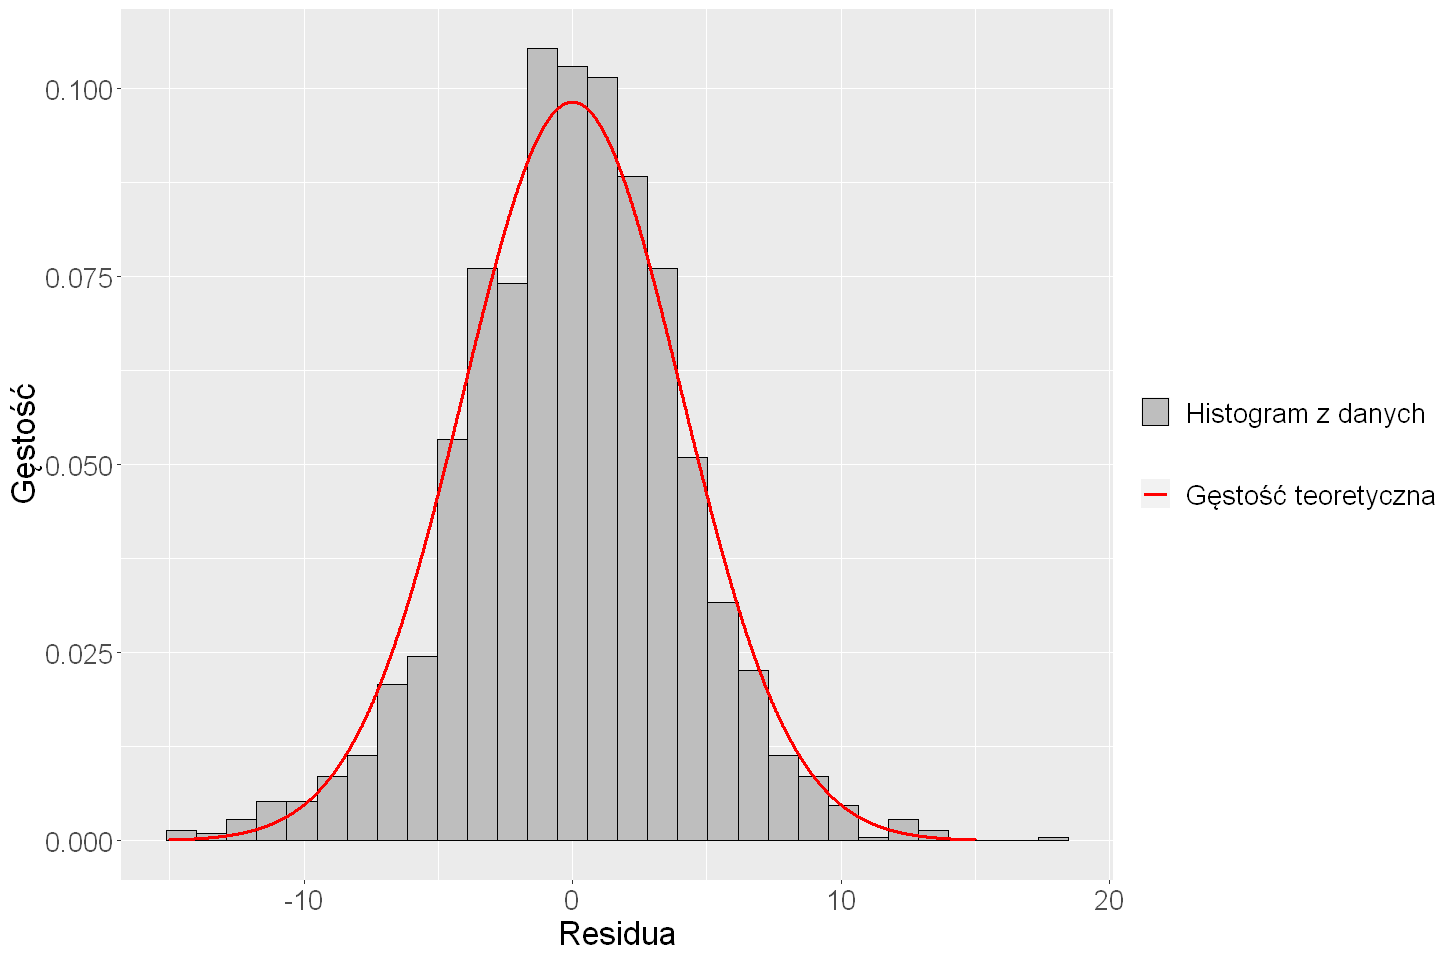

In [63]:
xs <- seq(-15, 15, 0.01)
plt <- ggplot() + 
  geom_histogram(aes(residuals, after_stat(density), fill="Histogram z danych"), col="black") +
  geom_line(aes(xs, dnorm(xs, 0, sd(residuals)), col="Gęstość teoretyczna"), linewidth=1) + 
  scale_color_manual(values=c("red")) +
  scale_fill_manual(values=c("grey")) + 
  xlab("Residua") + 
  ylab("Gęstość") +
  theme(legend.title=element_blank(), text = element_text(size = 20))
plt
ggsave("images/des_res.pdf", plt, width=14, height=6)

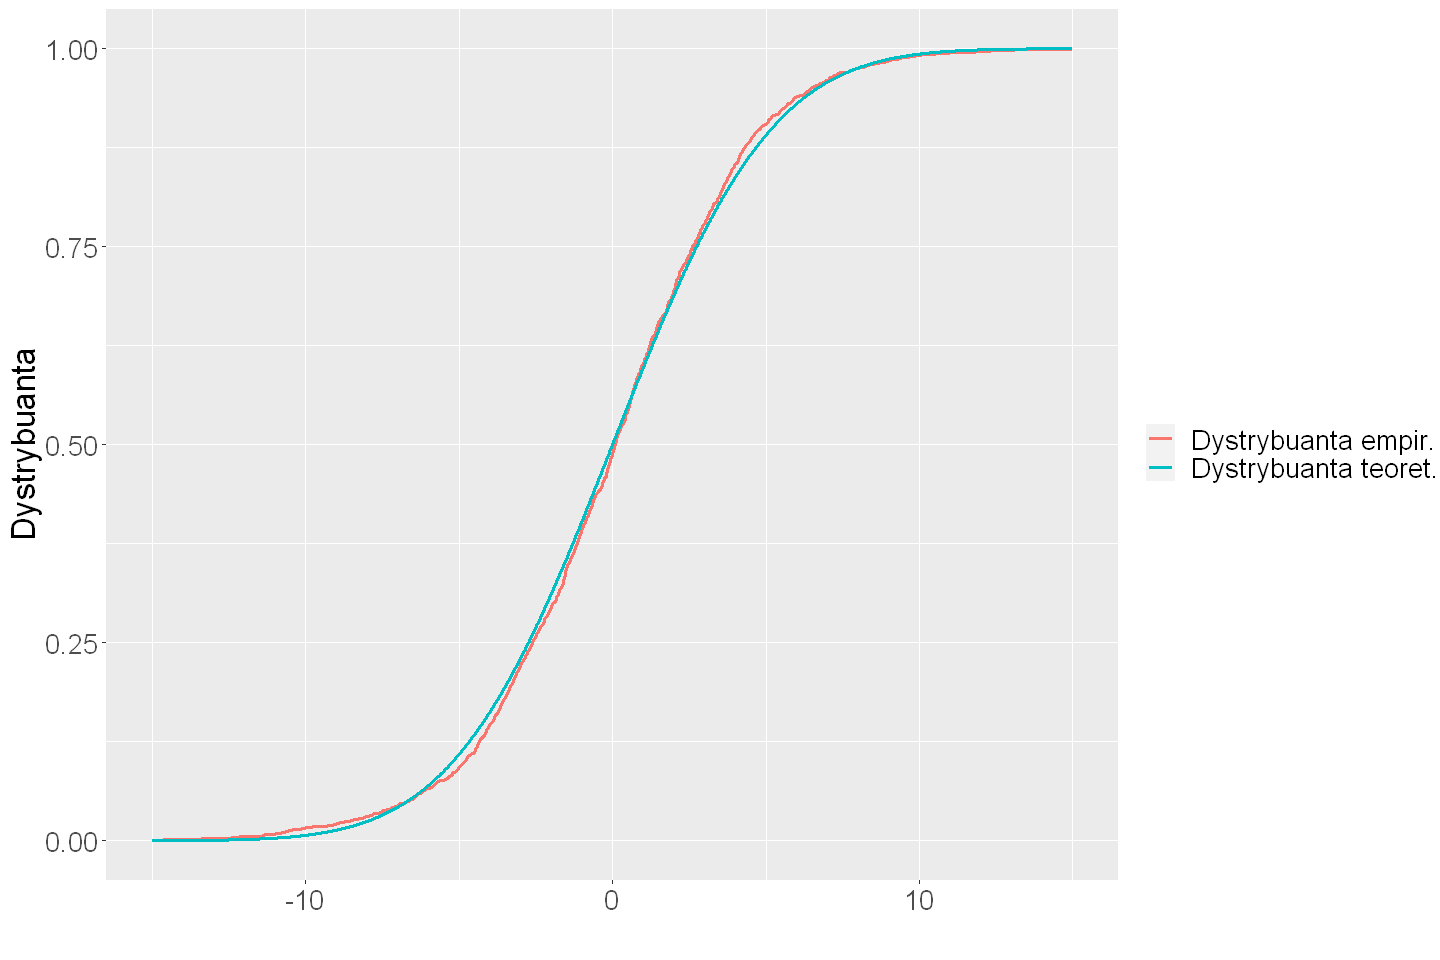

In [64]:
xs <- seq(-15, 15, 0.01)
F <- ecdf(residuals)
plt <- ggplot() + 
  geom_line(aes(xs, F(xs), col="Dystrybuanta empir."), linewidth=1) +
  geom_line(aes(xs, pnorm(xs, 0, sd(residuals)), col="Dystrybuanta teoret."), linewidth=1) + 
  xlab("") + 
  ylab("Dystrybuanta") +
  theme(legend.title=element_blank(), text = element_text(size = 20))
plt
ggsave("images/dys_res.pdf", plt, width=14, height=6)

In [93]:
ks.test(residuals, "pnorm", 0, sd(residuals))


	Asymptotic one-sample Kolmogorov-Smirnov test

data:  residuals
D = 0.022562, p-value = 0.2905
alternative hypothesis: two-sided


Don't know how to automatically pick scale for object of type <ts>. Defaulting
to continuous.


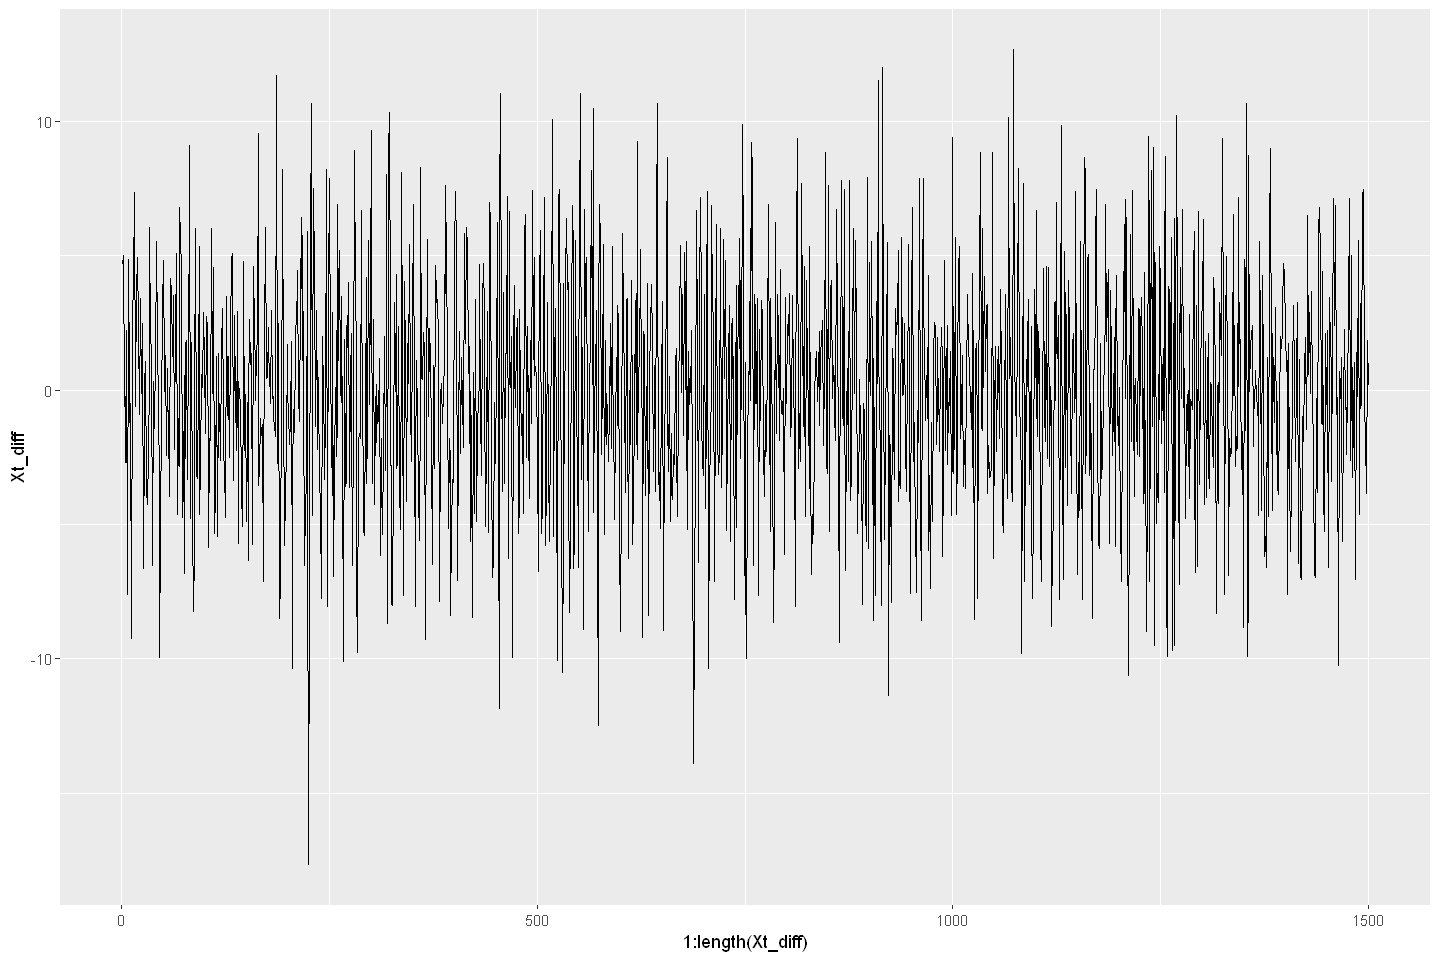

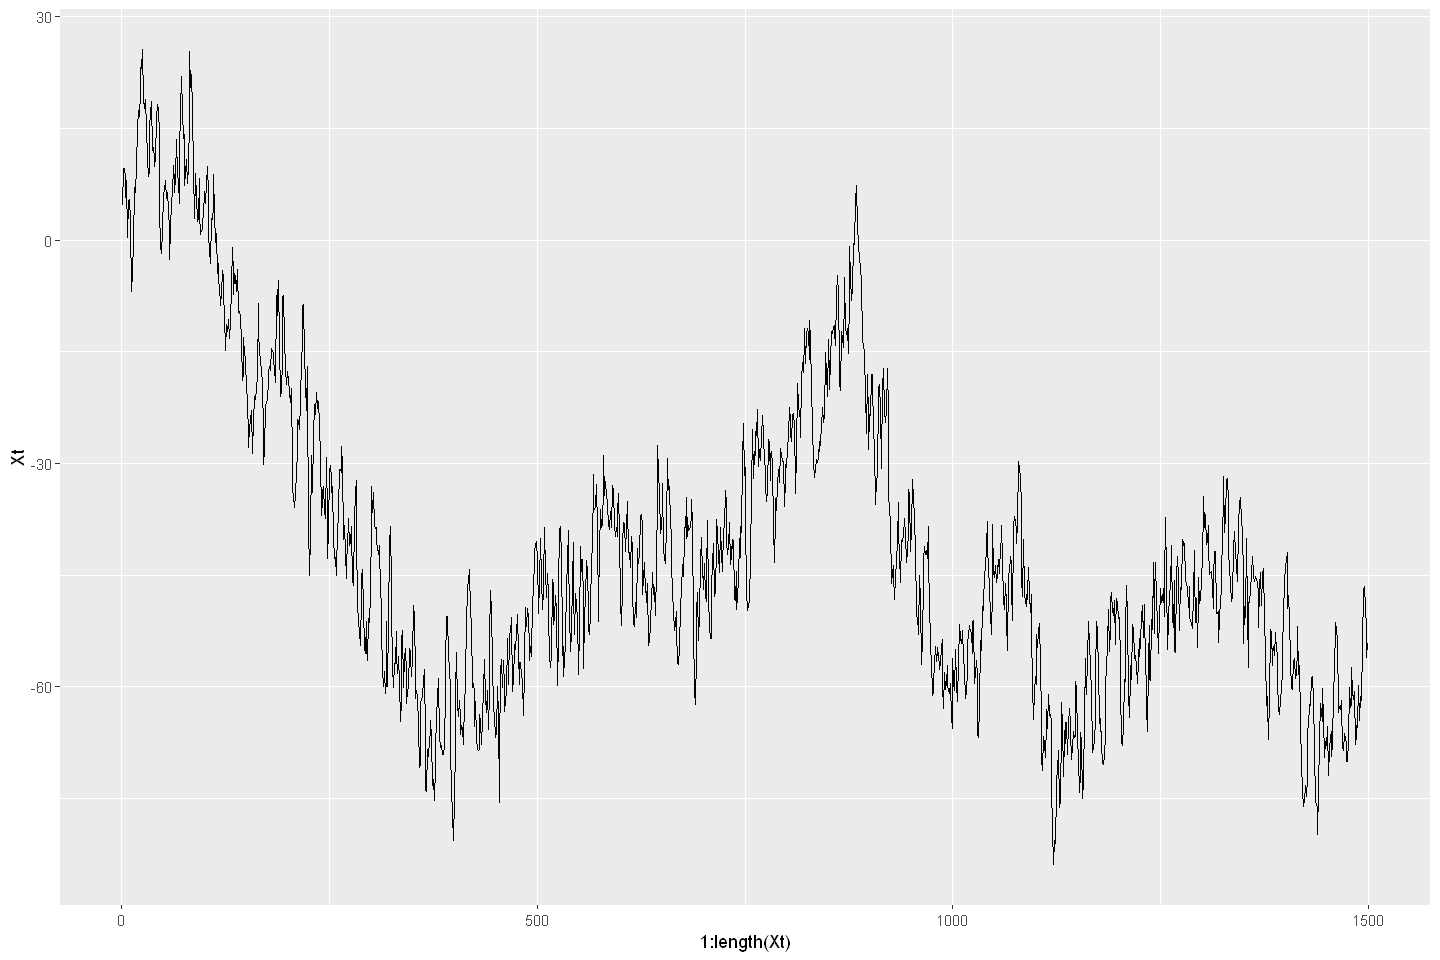

In [46]:
Xt_diff <- arima.sim(model = list(order = c(3, 0, 4), ar = c(0.7874, 0.8668, -0.664), ma = c(-0.747, -1.1119, 0.655, 0.2111)), n = 1500, sd = sqrt(16.39))
ggplot() + geom_line(aes(1:length(Xt_diff), Xt_diff))

Xt <- cumsum(Xt_diff)
ggplot() + geom_line(aes(1:length(Xt), Xt))